<a href="https://colab.research.google.com/github/pragneshrana/GAN/blob/master/Morphing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## First set GPU
- Upload your videos
- Change the parameters below as per need


In [36]:
files = ['trump.mp4','me.mp4']
NUM_FRAMES = 10

#don't chnage
person_dir = ['personA','personB']

In [37]:
!rm -r ./train
!mkdir train
!cd train
!mkdir ./train/personA
!mkdir ./train/personB
!mkdir ./train/personA_face
!mkdir ./train/personB_face

In [38]:
!pip install pip install largest-frontal-face-detector

In [39]:
import cv2
import os
import time
import matplotlib.pyplot as plt
import sys
import dlib
import argparse
import largest_face_detector
import copy

### Convert video to images

In [40]:
for i in range(len(files)):  
  Video_Path = files[i]
  video_Path = os.path.join(os.path.realpath('.'), Video_Path)
  save_path = os.path.join(os.path.realpath('.'), '/content/train/'+person_dir[i])


  cap = cv2.VideoCapture(video_Path)
  
  fourcc = cv2.VideoWriter_fourcc('M', 'J', 'P', 'G')
  frame_width = int(cap.get(3))
  frame_height =  int(cap.get(4))
  # out = cv2.VideoWriter('/content/train/personA/liu_out.avi', fourcc, 10, (frame_width, frame_height),isColor=False)

  n=0
  while (cap.isOpened()) and n<NUM_FRAMES:
      ret, frame = cap.read()
      # frame = frame.reshape(frame.shape[1],frame.shape[0],3)
      save_images = os.path.join(save_path, str(n)+'.jpg')

      #Resizing the image ......

      # #percent by which the image is resized
      # scale_percent = 50

      # #calculate the 50 percent of original dimensions
      # width = 960
      # height = 540

      # dsize
      dsize = (frame_width, frame_height)

      # resize image
      output = cv2.resize(frame, dsize)

      cv2.imwrite(save_images, output) #......change


      # n = n + 1
      if ret==True:
          # out.write(frame)
          # cv2.imshow('frame', frame)
          if cv2.waitKey(1) & 0xFF == ord('q'):
              break
      n = n +1
  print('Done')
  cap.release()
  # out.release()
  cv2.destroyAllWindows()

Done
Done


### Detect Face from images


processing image
Number of faces detected: 1


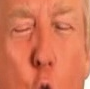

processing image
Number of faces detected: 1


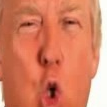

processing image
Number of faces detected: 1


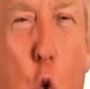

processing image
Number of faces detected: 1


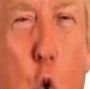

processing image
Number of faces detected: 1


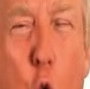

processing image
Number of faces detected: 1


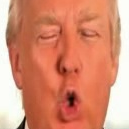

processing image
Number of faces detected: 1


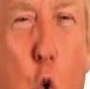

processing image
Number of faces detected: 1


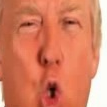

processing image
Number of faces detected: 1


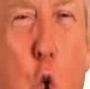

processing image
Number of faces detected: 1


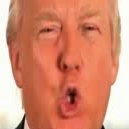

processing image
Number of faces detected: 1


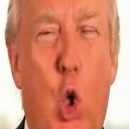

processing image
Number of faces detected: 1


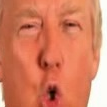

processing image
Number of faces detected: 1


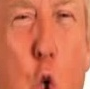

processing image
Number of faces detected: 1


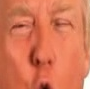

processing image
Number of faces detected: 1


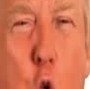

processing image
Number of faces detected: 1


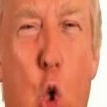

processing image
Number of faces detected: 1


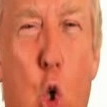

processing image
Number of faces detected: 1


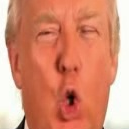

processing image
Number of faces detected: 1


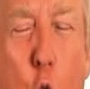

processing image
Number of faces detected: 1


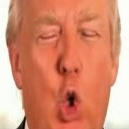

processing image
Number of faces detected: 1


processing image
Number of faces detected: 1


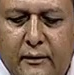

processing image
Number of faces detected: 1


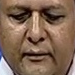

processing image
Number of faces detected: 1


processing image
Number of faces detected: 1


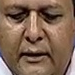

processing image
Number of faces detected: 1


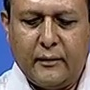

processing image
Number of faces detected: 1


processing image
Number of faces detected: 1


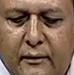

processing image
Number of faces detected: 1


processing image
Number of faces detected: 1


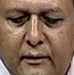

processing image
Number of faces detected: 1


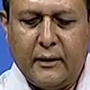

processing image
Number of faces detected: 1


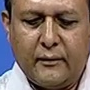

processing image
Number of faces detected: 1


processing image
Number of faces detected: 1


processing image
Number of faces detected: 1


processing image
Number of faces detected: 1


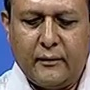

processing image
Number of faces detected: 1


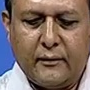

processing image
Number of faces detected: 1


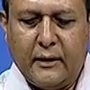

processing image
Number of faces detected: 1


processing image
Number of faces detected: 1


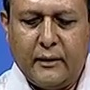

In [42]:
from google.colab.patches import cv2_imshow
for i in range(len(files))  :
  Images_Folder = '/content/train/'+person_dir[i]+'/'
  OutFace_Folder = '/content/train/'+person_dir[i]+'/'

  Images_Path = os.path.join(os.path.realpath('.'), Images_Folder)
  Out_Path = os.path.join(os.path.realpath('.'), OutFace_Folder)

  pictures = os.listdir(Images_Path)


  # initialize hog + svm based face detector
  detector = dlib.get_frontal_face_detector()

  # # handle command line arguments
  # ap = argparse.ArgumentParser()
  # ap.add_argument('-w', '--weights', default='./mmod_human_face_detector.dat',
  #                 help='path to weights file')
  # args = ap.parse_args()


  # # initialize CNN based face detector
  # detector = dlib.cnn_face_detection_model_v1(args.weights)

  # def rotate(img):
  #     rows,cols,_ = img.shape
  #     M = cv2.getRotationMatrix2D((cols, rows ), 0, 1)
  #     dst = cv2.warpAffine(img, M, (cols, rows))
  #     return dst

  for f in pictures:


      print('processing image')
      img = cv2.imread(os.path.join(Images_Path,f), cv2.IMREAD_COLOR)
      # try:
      #   b, g, r = cv2.split(img)
      #   img2 = cv2.merge([r, g, b])
      # except ValueError:
      #   continue
      # img = rotate(img)

      # f_copy = copy.deepcopy(f)
      # image = largest_face_detector.detect_largest_face(str(Images_Path)+'/'+str(f_copy))
      # cv2.imwrite(OutFace_Folder+f_copy[:-4]+"_large_face.jpg", image)


      dets = detector(img, 1)
      print("Number of faces detected: {}".format(len(dets)))

      for idx, face in enumerate(dets):
          # print('face{}; left{}; top {}; right {}; bot {}'.format(idx, face.left(). face.top(), face.right(), face.bottom()))

          left = face.left()
          top = face.top()
          right = face.right()
          bot = face.bottom()
          #print(left, top, right, bot)
          #cv2.rectangle(img, (left, top), (right, bot), (0, 255, 0), 3)
          #print(img.shape)
          crop_img = img[top:bot, left:right]
          #cv2.imshow(f, img)
          #cv2.imshow(f, crop_img)
          # print(OutFace_Folder,f[:-4],"_face.jpg")
          cv2.imwrite(OutFace_Folder+f[:-4]+"_face.jpg", crop_img)
          cv2_imshow(crop_img)
          #k = cv2.waitKey(1000)
          #cv2.destroyAllWindows()

### Padding convolution

In [ ]:
import torch.utils.data
from torch.nn import functional as F

import math
import torch
from torch.nn.parameter import Parameter
from torch.nn.functional import pad
from torch.nn.modules import Module
from torch.nn.modules.utils import _single, _pair, _triple


class _ConvNd(Module):

    def __init__(self, in_channels, out_channels, kernel_size, stride,
                 padding, dilation, transposed, output_padding, groups, bias):
        super(_ConvNd, self).__init__()
        if in_channels % groups != 0:
            raise ValueError('in_channels must be divisible by groups')
        if out_channels % groups != 0:
            raise ValueError('out_channels must be divisible by groups')
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        self.stride = stride
        self.padding = padding
        self.dilation = dilation
        self.transposed = transposed
        self.output_padding = output_padding
        self.groups = groups
        if transposed:
            self.weight = Parameter(torch.Tensor(
                in_channels, out_channels // groups, *kernel_size))
        else:
            self.weight = Parameter(torch.Tensor(
                out_channels, in_channels // groups, *kernel_size))
        if bias:
            self.bias = Parameter(torch.Tensor(out_channels))
        else:
            self.register_parameter('bias', None)
        self.reset_parameters()

    def reset_parameters(self):
        n = self.in_channels
        for k in self.kernel_size:
            n *= k
        stdv = 1. / math.sqrt(n)
        self.weight.data.uniform_(-stdv, stdv)
        if self.bias is not None:
            self.bias.data.uniform_(-stdv, stdv)

    def __repr__(self):
        s = ('{name}({in_channels}, {out_channels}, kernel_size={kernel_size}'
             ', stride={stride}')
        if self.padding != (0,) * len(self.padding):
            s += ', padding={padding}'
        if self.dilation != (1,) * len(self.dilation):
            s += ', dilation={dilation}'
        if self.output_padding != (0,) * len(self.output_padding):
            s += ', output_padding={output_padding}'
        if self.groups != 1:
            s += ', groups={groups}'
        if self.bias is None:
            s += ', bias=False'
        s += ')'
        return s.format(name=self.__class__.__name__, **self.__dict__)


class Conv2d(_ConvNd):

    def __init__(self, in_channels, out_channels, kernel_size, stride=1,
                 padding=0, dilation=1, groups=1, bias=True):
        kernel_size = _pair(kernel_size)
        stride = _pair(stride)
        padding = _pair(padding)
        dilation = _pair(dilation)
        super(Conv2d, self).__init__(
            in_channels, out_channels, kernel_size, stride, padding, dilation,
            False, _pair(0), groups, bias)

    def forward(self, input):
        return conv2d_same_padding(input, self.weight, self.bias, self.stride,
                        self.padding, self.dilation, self.groups)


# custom con2d, because pytorch don't have "padding='same'" option.
def conv2d_same_padding(input, weight, bias=None, stride=1, padding=1, dilation=1, groups=1):

    input_rows = input.size(2)
    filter_rows = weight.size(2)
    effective_filter_size_rows = (filter_rows - 1) * dilation[0] + 1
    out_rows = (input_rows + stride[0] - 1) // stride[0]
    padding_needed = max(0, (out_rows - 1) * stride[0] + effective_filter_size_rows -
                  input_rows)
    padding_rows = max(0, (out_rows - 1) * stride[0] +
                        (filter_rows - 1) * dilation[0] + 1 - input_rows)
    rows_odd = (padding_rows % 2 != 0)
    padding_cols = max(0, (out_rows - 1) * stride[0] +
                        (filter_rows - 1) * dilation[0] + 1 - input_rows)
    cols_odd = (padding_rows % 2 != 0)

    if rows_odd or cols_odd:
        input = pad(input, [0, int(cols_odd), 0, int(rows_odd)])

    return F.conv2d(input, weight, bias, stride,
                  padding=(padding_rows // 2, padding_cols // 2),
                  dilation=dilation, groups=groups)



In [ ]:
import torch
import torch.utils.data
from torch import nn, optim


def toTensor(img):
    img = torch.from_numpy(img.transpose((0, 3, 1, 2)))
    return img


def var_to_np(img_var):
    return img_var.data.cpu().numpy()


class _ConvLayer(nn.Sequential):
    def __init__(self, input_features, output_features):
        super(_ConvLayer, self).__init__()
        self.add_module('conv2', Conv2d(input_features, output_features,
                                        kernel_size=5, stride=2))
        self.add_module('leakyrelu', nn.LeakyReLU(0.1, inplace=True))


class _UpScale(nn.Sequential):
    def __init__(self, input_features, output_features):
        super(_UpScale, self).__init__()
        self.add_module('conv2_', Conv2d(input_features, output_features * 4,
                                         kernel_size=3))
        self.add_module('leakyrelu', nn.LeakyReLU(0.1, inplace=True))
        self.add_module('pixelshuffler', _PixelShuffler())


class Flatten(nn.Module):

    def forward(self, input):
        output = input.view(input.size(0), -1)
        return output


class Reshape(nn.Module):

    def forward(self, input):
        output = input.view(-1, 1024, 4, 4)  # channel * 4 * 4

        return output


class _PixelShuffler(nn.Module):
    def forward(self, input):
        batch_size, c, h, w = input.size()
        rh, rw = (2, 2)
        oh, ow = h * rh, w * rw
        oc = c // (rh * rw)
        out = input.view(batch_size, rh, rw, oc, h, w)
        out = out.permute(0, 3, 4, 1, 5, 2).contiguous()
        out = out.view(batch_size, oc, oh, ow)  # channel first

        return out


class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        self.encoder = nn.Sequential(
            _ConvLayer(3, 128),
            _ConvLayer(128, 256),
            _ConvLayer(256, 512),
            _ConvLayer(512, 1024),
            Flatten(),
            nn.Linear(1024 * 4 * 4, 1024),
            nn.Linear(1024, 1024 * 4 * 4),
            Reshape(),
            _UpScale(1024, 512),
        )

        self.decoder_A = nn.Sequential(
            _UpScale(512, 256),
            _UpScale(256, 128),
            _UpScale(128, 64),
            Conv2d(64, 3, kernel_size=5, padding=1),
            nn.Sigmoid(),
        )

        self.decoder_B = nn.Sequential(
            _UpScale(512, 256),
            _UpScale(256, 128),
            _UpScale(128, 64),
            Conv2d(64, 3, kernel_size=5, padding=1),
            nn.Sigmoid(),
        )

    def forward(self, x, select='A'):
        if select == 'A':
            out = self.encoder(x)
            out = self.decoder_A(out)
        else:
            out = self.encoder(x)
            out = self.decoder_B(out)
        return out


### Utils


In [ ]:
import cv2
import numpy
import os


def get_image_paths(directory):
    return [x.path for x in os.scandir(directory) if x.name.endswith(".jpg") or x.name.endswith(".png")
            or x.name.endswith(".JPG")]


def load_images(image_paths, convert=None):
    iter_all_images = (cv2.resize(cv2.imread(fn), (256, 256)) for fn in image_paths)
    if convert:
        iter_all_images = (convert(img) for img in iter_all_images)

    for i, image in enumerate(iter_all_images):
        if i == 0:
            all_images = numpy.empty((len(image_paths),) + image.shape, dtype=image.dtype)
        all_images[i] = image
    #print(len(all_images), all_images[1].shape)
    return all_images


def get_transpose_axes(n):
    if n % 2 == 0:
        y_axes = list(range(1, n - 1, 2))
        x_axes = list(range(0, n - 1, 2))
    else:
        y_axes = list(range(0, n - 1, 2))
        x_axes = list(range(1, n - 1, 2))
    return y_axes, x_axes, [n - 1]


def stack_images(images):
    images_shape = numpy.array(images.shape)
    new_axes = get_transpose_axes(len(images_shape))
    new_shape = [numpy.prod(images_shape[x]) for x in new_axes]
    return numpy.transpose(
        images,
        axes=numpy.concatenate(new_axes)
    ).reshape(new_shape)



# Umeyama

In [ ]:
# umeyama function from scikit-image/skimage/transform/_geometric.py

import numpy as np


def umeyama(src, dst, estimate_scale):
    """Estimate N-D similarity transformation with or without scaling.
    Parameters
    ----------
    src : (M, N) array
        Source coordinates.
    dst : (M, N) array
        Destination coordinates.
    estimate_scale : bool
        Whether to estimate scaling factor.
    Returns
    -------
    T : (N + 1, N + 1)
        The homogeneous similarity transformation matrix. The matrix contains
        NaN values only if the problem is not well-conditioned.
    References
    ----------
    .. [1] "Least-squares estimation of transformation parameters between two
            point patterns", Shinji Umeyama, PAMI 1991, DOI: 10.1109/34.88573
    """

    num = src.shape[0]
    dim = src.shape[1]

    # Compute mean of src and dst.
    src_mean = src.mean(axis=0)
    dst_mean = dst.mean(axis=0)

    # Subtract mean from src and dst.
    src_demean = src - src_mean
    dst_demean = dst - dst_mean

    # Eq. (38).
    A = np.dot(dst_demean.T, src_demean) / num

    # Eq. (39).
    d = np.ones((dim,), dtype=np.double)
    if np.linalg.det(A) < 0:
        d[dim - 1] = -1

    T = np.eye(dim + 1, dtype=np.double)

    U, S, V = np.linalg.svd(A)

    # Eq. (40) and (43).
    rank = np.linalg.matrix_rank(A)
    if rank == 0:
        return np.nan * T
    elif rank == dim - 1:
        if np.linalg.det(U) * np.linalg.det(V) > 0:
            T[:dim, :dim] = np.dot(U, V)
        else:
            s = d[dim - 1]
            d[dim - 1] = -1
            T[:dim, :dim] = np.dot(U, np.dot(np.diag(d), V))
            d[dim - 1] = s
    else:
        T[:dim, :dim] = np.dot(U, np.dot(np.diag(d), V.T))

    if estimate_scale:
        # Eq. (41) and (42).
        scale = 1.0 / src_demean.var(axis=0).sum() * np.dot(S, d)
    else:
        scale = 1.0

    T[:dim, dim] = dst_mean - scale * np.dot(T[:dim, :dim], src_mean.T)
    T[:dim, :dim] *= scale

    return T


### Image Augmentation

In [ ]:
import cv2
import numpy

random_transform_args = {
    'rotation_range': 10,
    'zoom_range': 0.05,
    'shift_range': 0.05,
    'random_flip': 0.4,
}


def random_transform(image, rotation_range, zoom_range, shift_range, random_flip):
    h, w = image.shape[0:2]
    rotation = numpy.random.uniform(-rotation_range, rotation_range)
    scale = numpy.random.uniform(1 - zoom_range, 1 + zoom_range)
    tx = numpy.random.uniform(-shift_range, shift_range) * w
    ty = numpy.random.uniform(-shift_range, shift_range) * h
    mat = cv2.getRotationMatrix2D((w // 2, h // 2), rotation, scale)
    mat[:, 2] += (tx, ty)
    result = cv2.warpAffine(image, mat, (w, h), borderMode=cv2.BORDER_REPLICATE)
    if numpy.random.random() < random_flip:
        result = result[:, ::-1]
    return result


# get pair of random warped images from aligened face image
def random_warp(image):
    assert image.shape == (256, 256, 3)
    range_ = numpy.linspace(128 - 80, 128 + 80, 5)
    mapx = numpy.broadcast_to(range_, (5, 5))
    mapy = mapx.T

    mapx = mapx + numpy.random.normal(size=(5, 5), scale=5)
    mapy = mapy + numpy.random.normal(size=(5, 5), scale=5)

    interp_mapx = cv2.resize(mapx, (80, 80))[8:72, 8:72].astype('float32')
    interp_mapy = cv2.resize(mapy, (80, 80))[8:72, 8:72].astype('float32')

    warped_image = cv2.remap(image, interp_mapx, interp_mapy, cv2.INTER_LINEAR)

    src_points = numpy.stack([mapx.ravel(), mapy.ravel()], axis=-1)
    dst_points = numpy.mgrid[0:65:16, 0:65:16].T.reshape(-1, 2)
    mat = umeyama(src_points, dst_points, True)[0:2]

    target_image = cv2.warpAffine(image, mat, (64, 64))

    return warped_image, target_image


#### Image training data

In [ ]:
import numpy

random_transform_args = {
    'rotation_range': 10,
    'zoom_range': 0.05,
    'shift_range': 0.05,
    'random_flip': 0.4,
}


def get_training_data(images, batch_size):
    indices = numpy.random.randint(len(images), size=batch_size)
    for i, index in enumerate(indices):
        image = images[index]
        #print("before transform size is {}".format(image.shape))
        image = random_transform(image, **random_transform_args)
        #print("after transform size is {}".format(image.shape))

        warped_img, target_img = random_warp(image)
        #print("after warp size is {}".format(warped_img.shape))

        if i == 0:
            warped_images = numpy.empty((batch_size,) + warped_img.shape, warped_img.dtype)
            target_images = numpy.empty((batch_size,) + target_img.shape, warped_img.dtype)

        warped_images[i] = warped_img
        target_images[i] = target_img

    return warped_images, target_images


## Main Training

In [ ]:
from __future__ import print_function
import os

import cv2
import numpy as np
import torch

import torch.utils.data
from torch import nn, optim
from torch.nn import functional as F
import torch.backends.cudnn as cudnn


batch_size = 64 #input batch size for training
epochs = 1005 #number of epochs to train 
cuda = torch.cuda.is_available()  #enables CUDA training
seed = 1 #random seed 
log_interval =  100 #how many batches to wait before logging training status

if cuda is True:
    print('===> Using GPU to train')
    device = torch.device('cuda:0')
    cudnn.benchmark = True
else:
    device = torch.device('cpu')
    print('===> Using CPU to train')

torch.manual_seed(seed)
if cuda:
    torch.cuda.manual_seed(seed)

print('===> Loaing datasets')
images_A = get_image_paths("/content/train/personA_face")
images_B = get_image_paths("/content/train/personB_face")
images_A = load_images(images_A) / 255.0
images_B = load_images(images_B) / 255.0
#images_A += images_B.mean(axis=(0, 1, 2)) - images_A.mean(axis=(0, 1, 2))

model = Autoencoder().to(device)

print('===> Try resume from checkpoint')
if os.path.isdir('checkpoint'):
    try:
        checkpoint = torch.load('./checkpoint/autoencoder.t7')
        model.load_state_dict(checkpoint['state'])
        start_epoch = checkpoint['epoch']
        print('===> Load last checkpoint data')
    except FileNotFoundError:
        print('Can\'t found autoencoder.t7')
else:
    start_epoch = 0
    print('===> Start from scratch')


criterion = nn.L1Loss()
optimizer_1 = optim.Adam([{'params': model.encoder.parameters()},
                          {'params': model.decoder_A.parameters()}]
                         , lr=5e-5, betas=(0.5, 0.999))
optimizer_2 = optim.Adam([{'params': model.encoder.parameters()},
                          {'params': model.decoder_B.parameters()}]
                         , lr=5e-5, betas=(0.5, 0.999))

# print all the parameters im model
s = sum([np.prod(list(p.size())) for p in model.parameters()])
print('Number of params: %d' % s)

if __name__ == "__main__":

    print('Start training, press \'q\' to stop')

    for epoch in range(start_epoch, epochs):
        batch_size = batch_size

        warped_A, target_A = get_training_data(images_A, batch_size)
        warped_B, target_B = get_training_data(images_B, batch_size)

        # print("warped_A size is {}".format(warped_A.shape))
        # print("warped_A type is {}".format(type(warped_A)))

        warped_A, target_A = toTensor(warped_A), toTensor(target_A)
        warped_B, target_B = toTensor(warped_B), toTensor(target_B)

        if cuda:
          warped_A = warped_A.to(device).float()
          target_A = target_A.to(device).float()
          warped_B = warped_B.to(device).float()
          target_B = target_B.to(device).float()

        optimizer_1.zero_grad()
        optimizer_2.zero_grad()

        print("warped_A type is {}".format(type(warped_A)))

        warped_A = model(warped_A, 'A')
        warped_B = model(warped_B, 'B')

        #print("warped_A size is {}".format(warped_A.size()))
        #exit(0)

        loss1 = criterion(warped_A, target_A)
        loss2 = criterion(warped_B, target_B)
        loss = loss1.item() + loss2.item()
        loss1.backward()
        loss2.backward()
        optimizer_1.step()
        optimizer_2.step()
        print('epoch: {}, lossA:{}, lossB:{}'.format(epoch, loss1.item(), loss2.item()))

        if epoch % log_interval == 0:

            test_A_ = target_A[0:14]
            test_B_ = target_B[0:14]
            test_A = var_to_np(target_A[0:14])
            test_B = var_to_np(target_B[0:14])
            #print("input size is {}".format(test_B_.size()))
            print('===> Saving models...')
            state = {
                'state': model.state_dict(),
                'epoch': epoch
            }
            if not os.path.isdir('checkpoint'):
                os.mkdir('checkpoint')
            torch.save(state, './checkpoint/autoencoder.t7')

        figure_A = np.stack([
            test_A,
            var_to_np(model(test_A_, 'A')),
            var_to_np(model(test_A_, 'B')),
        ], axis=1)
        #print("figure A shape is {}".format(figure_A.shape))
        figure_B = np.stack([
            test_B,
            var_to_np(model(test_B_, 'B')),
            var_to_np(model(test_B_, 'A')),
        ], axis=1)
        figure = np.concatenate([figure_A, figure_B], axis=0)
        #print("figure shape is {}".format(figure.shape))

        figure = figure.transpose((0, 1, 3, 4, 2))
        #print("figure shape after transpose is {}".format(figure.shape))

        figure = figure.reshape((4, 7) + figure.shape[1:])
        #print("figure shape after reshape is {}".format(figure.shape))

        figure = stack_images(figure)
        #print("figure shape after stack_images is {}".format(figure.shape))
        #exit(0)
        figure = np.clip(figure * 255, 0, 255).astype('uint8')

        # cv2.imshow("", figure)
        cv2.imwrite("combined.jpg",figure)
        key = cv2.waitKey(1)
        if key == ord('q'):
            exit()


===> Using GPU to train
===> Loaing datasets
===> Try resume from checkpoint
===> Load last checkpoint data
Number of params: 82062470
Start training, press 'q' to stop
warped_A type is <class 'torch.Tensor'>
epoch: 900, lossA:0.035838376730680466, lossB:0.049534089863300323
===> Saving models...
warped_A type is <class 'torch.Tensor'>
epoch: 901, lossA:0.07308780401945114, lossB:0.060525715351104736
warped_A type is <class 'torch.Tensor'>
epoch: 902, lossA:0.04195964336395264, lossB:0.04907285422086716
warped_A type is <class 'torch.Tensor'>
epoch: 903, lossA:0.05539657920598984, lossB:0.05258127301931381
warped_A type is <class 'torch.Tensor'>
epoch: 904, lossA:0.039454471319913864, lossB:0.05336213856935501
warped_A type is <class 'torch.Tensor'>
epoch: 905, lossA:0.038408029824495316, lossB:0.04869963973760605
warped_A type is <class 'torch.Tensor'>
epoch: 906, lossA:0.03761579841375351, lossB:0.05085870623588562
warped_A type is <class 'torch.Tensor'>
epoch: 907, lossA:0.038423791

## Convert/Generate Video

In [ ]:
video_name = '/content/trump.mp4'
video_path = os.path.join(os.path.realpath('.'), video_name)

##################################################
# Extract faces
##################################################
device = torch.device('cuda:0')
# device = torch.device('cpu')

def extract_face(frame):
    print('Method called - extract_face')
    detector = dlib.get_frontal_face_detector()
    img = frame
    dets = detector(img, 1)
    for idx, face in enumerate(dets):
        position = {}
        position['left'] = face.left()
        position['top'] = face.top()
        position['right'] = face.right()
        position['bot'] = face.bottom()
        croped_face = img[position['top']:position['bot'], position['left']:position['right']]
        print('Method Exiting - extract_face')
        return position, croped_face


def extract_faces(video_path):
    cap = cv2.VideoCapture(video_path)
    n = 0
    print(cap.isOpened())
    while (cap.isOpened() and n<1000):
        print('Inside Loop')
        _, frame = cap.read()
        position, croped_face= extract_face(frame) #function called
        # print(croped_face.shape)
        # exit(0)
        # cv2.imshow("croped_face",croped_face)
        # cv2.waitKey(2000)
        # cv2.destroyAllWindows()
        converted_face = convert_face(croped_face)  #function called
        converted_face = converted_face.squeeze(0)
        converted_face = var_to_np(converted_face)
        converted_face = converted_face.transpose(1,2,0)
        converted_face = np.clip(converted_face * 255, 0, 255).astype('uint8')
        # cv2.imshow("converted_face", cv2.resize(converted_face, (256,256)))
        cv2.waitKey(2000)
        back_size = cv2.resize(converted_face, (croped_face.shape[0], croped_face.shape[1]))
        # cv2.imshow("back_face", back_size)
        # cv2.waitKey(1000)
        # print(frame.shape)
        # print(back_size.shape)
        merged = merge(position, back_size, frame) #function called
        # print(merged.shape)
        out.write(merged)
        # cv2.imshow('frame', frame)
        # if cv2.waitKey(1) & 0xFF == ord('q'):
        #     break
        n = n + 1
        print(n)
    print("exit")

def convert_face(croped_face):
    print('Method called - convert_face')
    resized_face = cv2.resize(croped_face, (256, 256))
    normalized_face = resized_face / 255.0
    #normalized_face = normalized_face.reshape(1, normalized_face.shape[0], normalized_face.shape[1], normalized_face.shape[2])
    warped_img, _ = random_warp(normalized_face)
    batch_warped_img = np.expand_dims(warped_img, axis=0)

    batch_warped_img = toTensor(batch_warped_img)
    batch_warped_img = batch_warped_img.to(device).float()
    #print(batch_warped_img.shape, batch_warped_img)
    model = Autoencoder().to(device)
    checkpoint = torch.load('./checkpoint/autoencoder.t7')
    model.load_state_dict(checkpoint['state'])

    converted_face = model(batch_warped_img,'B')
    #print(converted_face.size())
    return converted_face

def merge(postion, face, body):
    print('Method called - convert_face')
    #im = cv2.imread("train/images/wood-texture.jpg")
    #obj = cv2.imread("train/images/iloveyouticket.jpg")
    #print(body.shape)
    mask = 255 * np.ones(face.shape, face.dtype)
    width, height, channels = body.shape
    center = (postion['left']+(postion['right']-postion['left'])//2, postion['top']+(postion['bot']-postion['top'])//2)
    normal_clone = cv2.seamlessClone(face, body, mask, center, cv2.NORMAL_CLONE)
    return normal_clone

# def InitwriteVideo():
#     fourcc = cv2.VideoWriter_fourcc()
#     frame_width = int(cap.get(3))
#     frame_height = int(cap.get(4))

print(video_path)
fourcc = cv2.VideoWriter_fourcc('M', 'J', 'P', 'G')
out = cv2.VideoWriter("me4_out.avi", fourcc, 3, (450, 360))
extract_faces(video_path)

out.release()

Streaming output truncated to the last 5000 lines.
Inside Loop
Method called - extract_face
Method Exiting - extract_face
Method called - convert_face
Method called - convert_face
168
Inside Loop
Method called - extract_face
Method Exiting - extract_face
Method called - convert_face
Method called - convert_face
169
Inside Loop
Method called - extract_face
Method Exiting - extract_face
Method called - convert_face
Method called - convert_face
170
Inside Loop
Method called - extract_face
Method Exiting - extract_face
Method called - convert_face
Method called - convert_face
171
Inside Loop
Method called - extract_face
Method Exiting - extract_face
Method called - convert_face
Method called - convert_face
172
Inside Loop
Method called - extract_face
Method Exiting - extract_face
Method called - convert_face
Method called - convert_face
173
Inside Loop
Method called - extract_face
Method Exiting - extract_face
Method called - convert_face
Method called - convert_face
174
Inside Loop
Method